In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from numpy.linalg import inv

In [224]:
D = 100
N = 10

In [240]:
L = np.zeros((D - 2, D))

for i in range(D - 2):
    j = i
    L[i, j] = -0.5
    L[i, j + 1] = 1
    L[i, j + 2] = -0.5

In [241]:
observed = stats.randint.rvs(1, D - 2, size = N)
unobserved = np.delete(range(D), observed)
x2 = stats.norm.rvs(0, 5, N)

In [242]:
L1 = L[:, unobserved]
L2 = L[:, observed]
L = np.hstack([L1, L2])

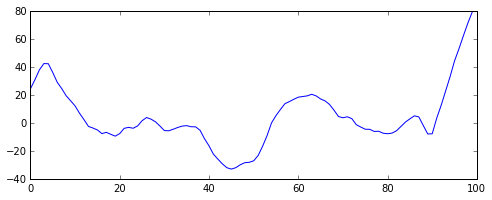

In [247]:
lmbda = 1.1
Sigma = inv(L1.T.dot(L1))
mu = -Sigma.dot(L1.T.dot(L2)).dot(x2)
x1 = stats.multivariate_normal.rvs(mu, Sigma)
x = np.empty(D)
x[observed] = x2
x[unobserved] = x1
plt.figure(figsize = (8, 3))
plt.plot(x)
plt.show()